## GRASP

In [1]:
import sys
sys.path.append('../src/')

%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from alg import *
from utils import *

In [2]:
num_trials = 5
resources = [5, 10, 15, 20]
cc_ratios = [0.25, 0.5, 0.75]

def opt_bound(R, p):
    _, m, r, = lpt(R, p)
    return m / r

def lpt_value(R, p):
    _, m, _, = lpt(R, p)
    return m

def makespan(R, p, cc_ratio):
    _, m = grasp(R=R, p=p, cc_ratio=cc_ratio)
    return m

## Comparison on sub-optimal instance

In [3]:
def eval_subopt_lpt(R):
    _, m, r, = lpt(R, p=suboptimal_instance(R))
    return m / r, m

def eval_subopt_grasp(cc_ratio):
    for R in resources:
        yield sum(makespan(R, suboptimal_instance(R), cc_ratio) for _ in range(num_trials)) / num_trials

In [4]:
lpt_df = pd.DataFrame(data=(eval_subopt_lpt(R) for R in resources), index=resources, columns=['opt_bound', 'lpt'])
grasp_df = pd.DataFrame({f'grasp (%{cc_ratio})': eval_subopt_grasp(cc_ratio) for cc_ratio in cc_ratios}, index=resources)

pd.concat([lpt_df, grasp_df], axis=1)

,opt_bound,lpt,grasp (%0.25),grasp (%0.5),grasp (%0.75)
5,13.571429,19.0,16.2,16.0,16.0
10,28.536585,39.0,37.4,37.6,36.8
15,43.524590,59.0,64.0,62.4,63.4
20,58.518519,79.0,89.8,91.4,87.6


<AxesSubplot:title={'center':'Quality relative to LPT for sub-optimal instances'}, ylabel='#resources (R)'>

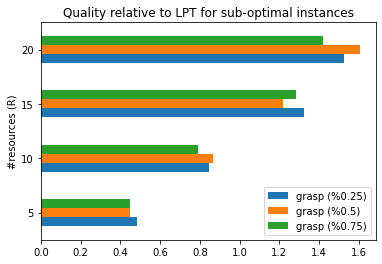

In [8]:
df = grasp_df.sub(lpt_df.opt_bound, axis=0).div(lpt_df.lpt - lpt_df.opt_bound, axis=0)
df.plot.barh(ylabel='norm. quality(GRASP)/quality(LPT)', xlabel='#resources (R)', title='Quality relative to LPT for sub-optimal instances')